<a href="https://colab.research.google.com/github/Amimo-cell/datascience/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
#uploading files from pc
data = files.upload()

Saving WineQT.csv to WineQT.csv


In [ ]:
#converting the file into a dataframe
data= pd.read_csv(io.StringIO(data['WineQT.csv'].decode('utf-8')))
#view the dataframe
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [49]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
SCALE=StandardScaler()

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [ ]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
data['alcohol'] = data['alcohol'].astype(int)

In [ ]:
X = data[['alcohol']]
Y = data['quality']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]

array([5.31023103, 5.31023103, 5.31023103, 5.31023103, 5.31023103])

In [ ]:
#What is the value of the intercept (a)
lm.intercept_

np.float64(2.194376489196293)

In [ ]:
#slope of the model
lm.coef_

array([0.34620606])

In [ ]:
#Yhat= a + bX

In [ ]:
#Quality=lm.intercept_+lm.coef_*X
Yhat= 2.194376489196293 + 0.34620606*data['quality']

In [ ]:
#Multiple linear regression
#Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4

In [ ]:
z = data[['fixed acidity', 'alcohol', 'residual sugar', 'total sulfur dioxide']]

In [ ]:
lm.fit(z, data['quality'])

LinearRegression()

In [ ]:
lm.intercept_

np.float64(1.7598018471403196)

In [ ]:
lm.coef_

array([ 0.06859014,  0.34433906, -0.01332378, -0.00180932])

In [ ]:
data['alcohol'] = data['alcohol'].astype(int)
data['residual sugar'] = data['residual sugar'].astype(int)
data['total sulfur dioxide'] = data['total sulfur dioxide'].astype(int)
data['fixed acidity']= data['fixed acidity'].astype(int)

In [ ]:
#Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
Yhat = 1.7598018471403196 + 0.06859014*data['fixed acidity'] + 0.34433906*data['alcohol']


In [ ]:
#modeling using visualization
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

(0.0, 8.25)

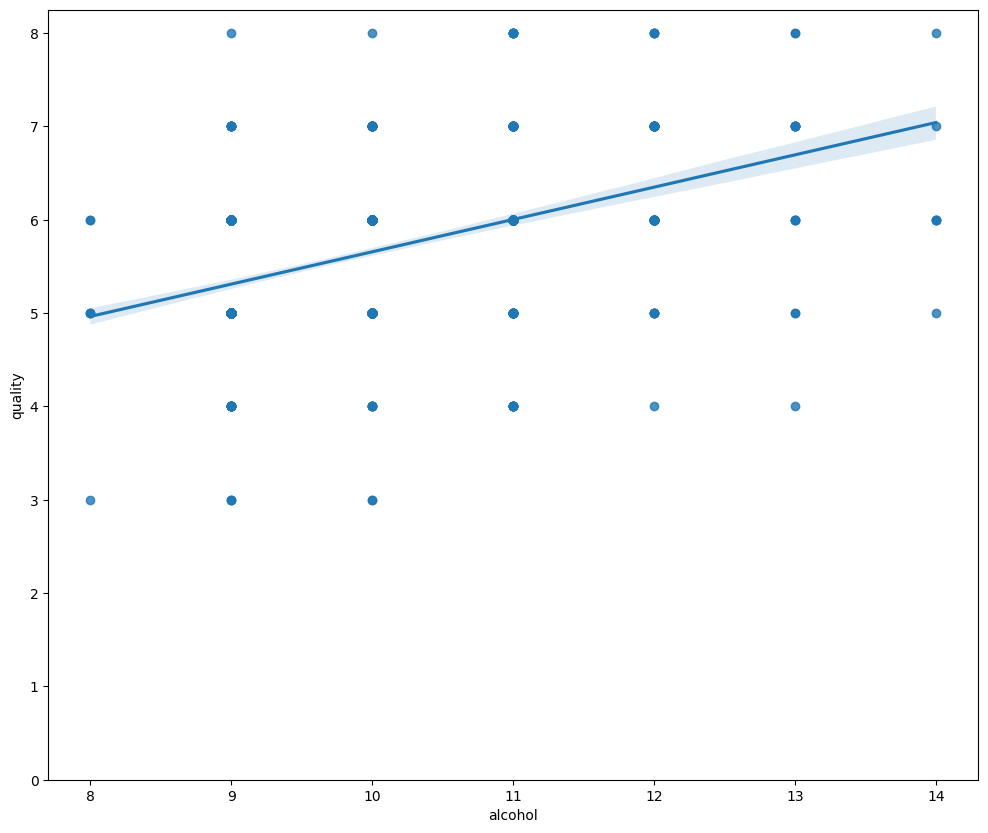

In [ ]:
#Regression Plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="alcohol", y="quality", data=data)
plt.ylim(0,)

(0.0, 8.25)

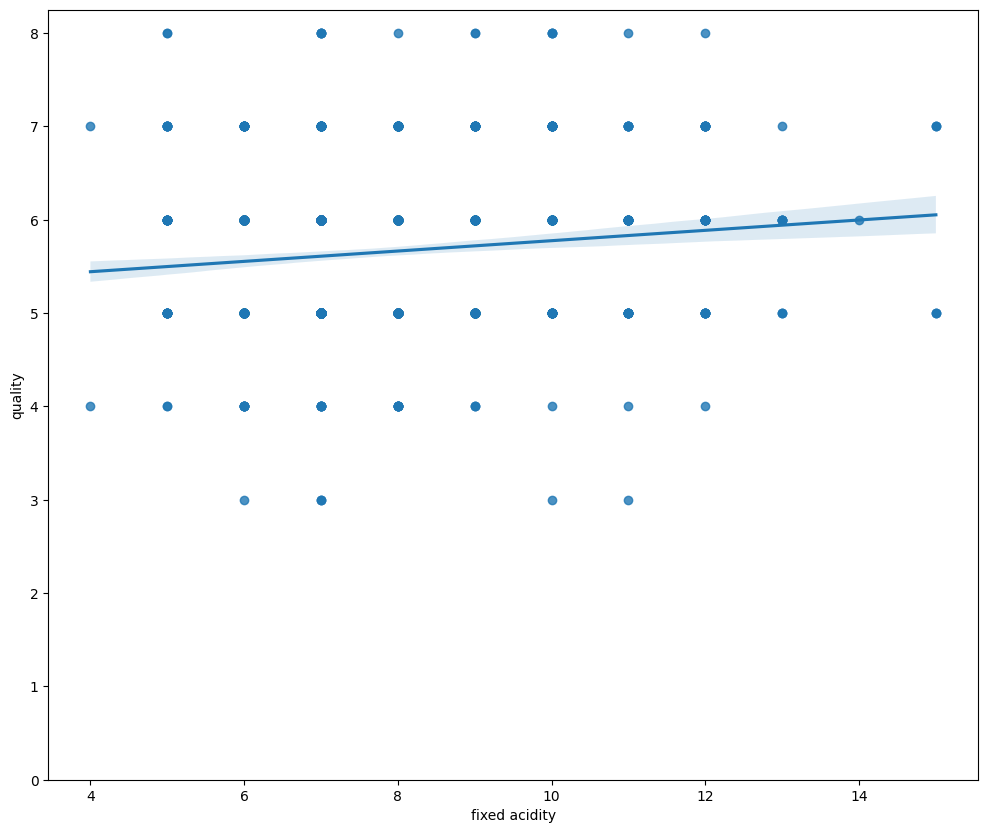

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="fixed acidity", y="quality", data=data)
plt.ylim(0,)

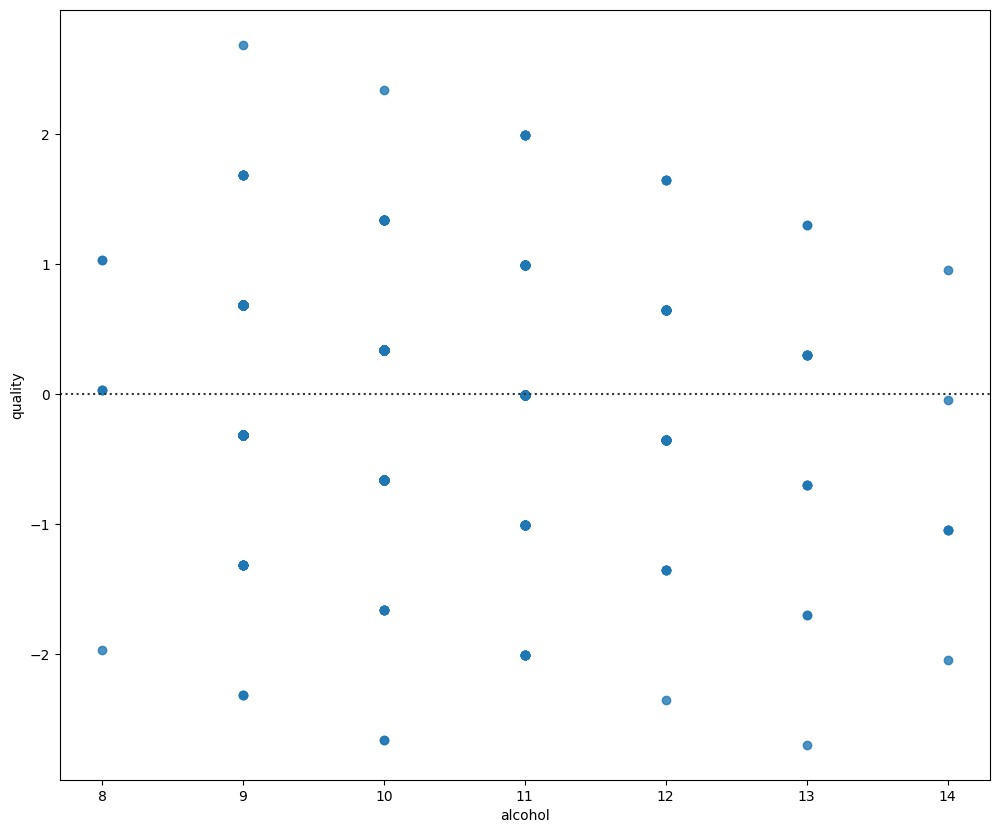

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=data['alcohol'],y=data['quality'])
plt.show()

In [ ]:
Y_hat = lm.predict(z)

<ipython-input-27-ee3208fb9ff1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data['quality'], hist=False, color="r", label="Actual Value")
<ipython-input-27-ee3208fb9ff1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Valu

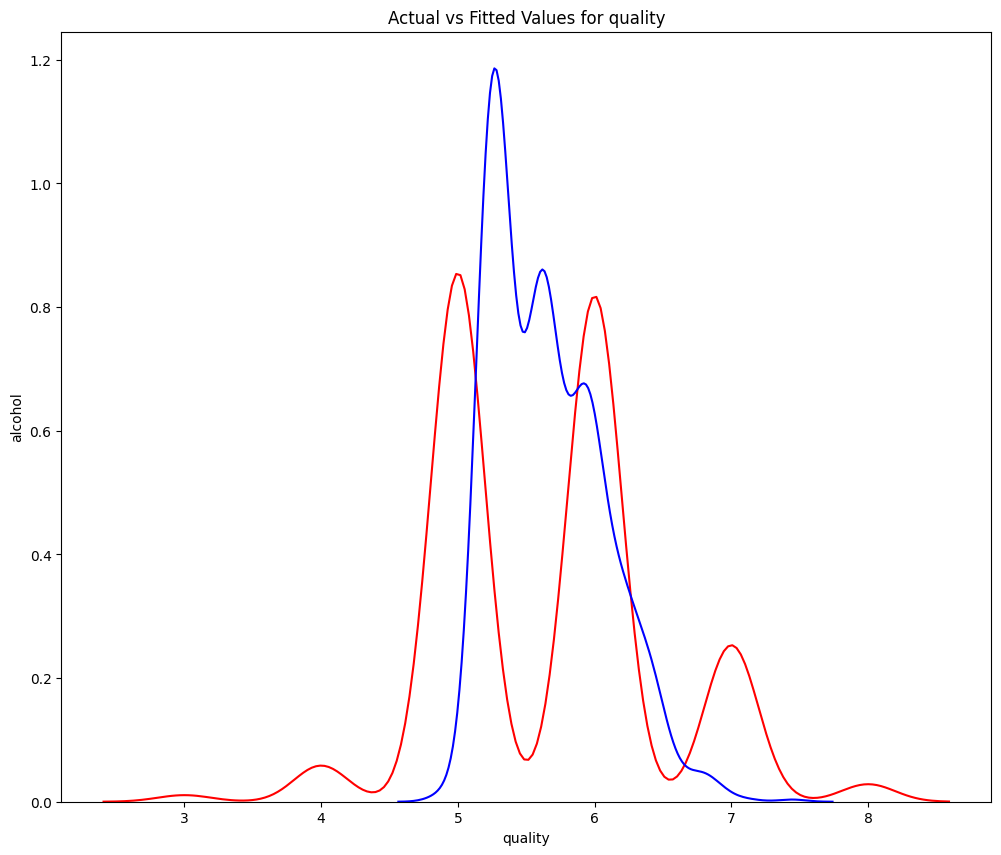

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(data['quality'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for quality')
plt.xlabel('quality')
plt.ylabel('alcohol')

plt.show()
plt.close()

In [ ]:
#Polynomial Regression and pipelines
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Alcohol ~ Quality')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('quality')
    plt.ylabel('alcohol')

    plt.show()
    plt.close()





In [ ]:
x = data['quality']
y = data['alcohol']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

          3        2
-0.05875 x + 1.14 x - 6.52 x + 20.96


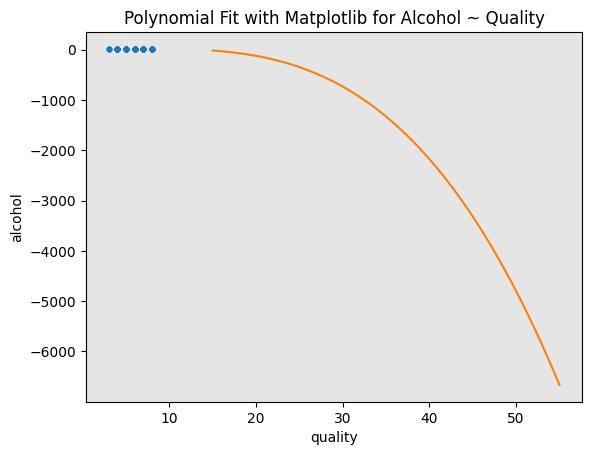

In [ ]:
PlotPolly(p, x, y, 'alcohol')

In [ ]:
np.polyfit(x, y, 3)

array([-0.05875443,  1.13973999, -6.51964966, 20.96259768])

In [ ]:
f = np.polyfit(x, y, 2)
p = np.poly1d(f)
print(p)

        2
0.1419 x - 0.9971 x + 11.01


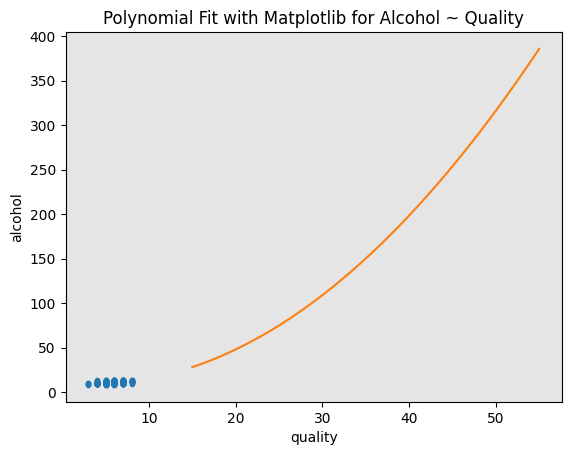

In [ ]:
PlotPolly(p, x, y, 'alcohol')

           11             10             9             8             7
3.707e-08 x  - 1.915e-07 x  - 2.156e-06 x - 6.456e-06 x + 5.646e-05 x
             6            5           4          3         2
 + 0.000808 x + 0.003652 x - 0.01364 x - 0.2716 x - 0.683 x + 12.56 x - 15.43


<ipython-input-46-14097a36e713>:1: RankWarning: Polyfit may be poorly conditioned
  f = np.polyfit(x, y, 11)


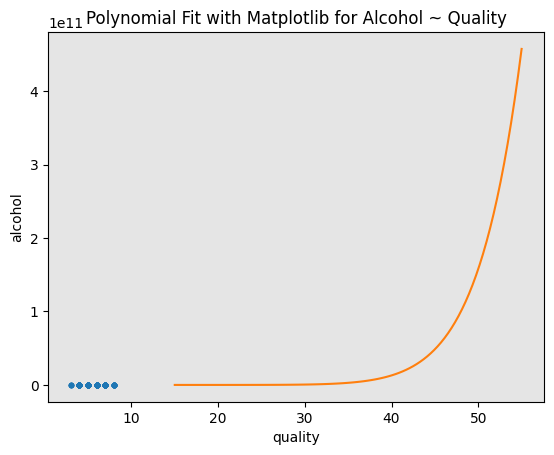

In [46]:
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'alcohol')

In [47]:
from sklearn.preprocessing import PolynomialFeatures